Bank Fraud Detection-EDA

In [3]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [4]:
df=pd.read_csv("C:/Users/AASHISH/Downloads/Dataset.csv")

In [5]:
df.drop('isFlaggedFraud',axis=1,inplace=True)

In [6]:
df.head

<bound method NDFrame.head of          step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
0             160296.36  M1979787155            0.00            0.00        0  
1              19

In [ ]:
df['step']

0           1
1           1
2           1
3           1
4           1
           ..
1048570    95
1048571    95
1048572    95
1048573    95
1048574    95
Name: step, Length: 1048575, dtype: int64

**Correlation graph**

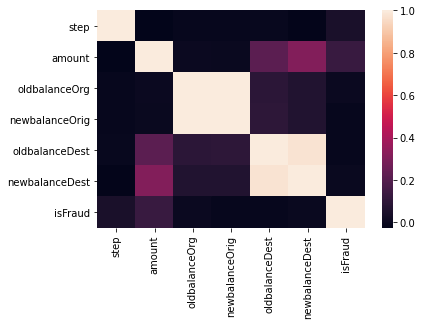

In [ ]:
sns.heatmap(df.corr())

**Dispersion Over Amount **

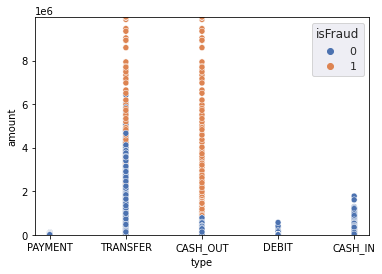

In [ ]:
ymin,ymax=plt.ylim()
scale_factor=9977762
plt. ylim(ymin * scale_factor, ymax * scale_factor)
sns.set(rc={'figure.figsize': (10,10)})
sns.scatterplot(data=df,x=df['type'],y=df['amount'],hue=df['isFraud'])

**Number of fraud and genuine transactions w.r.t to type of Transaction**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



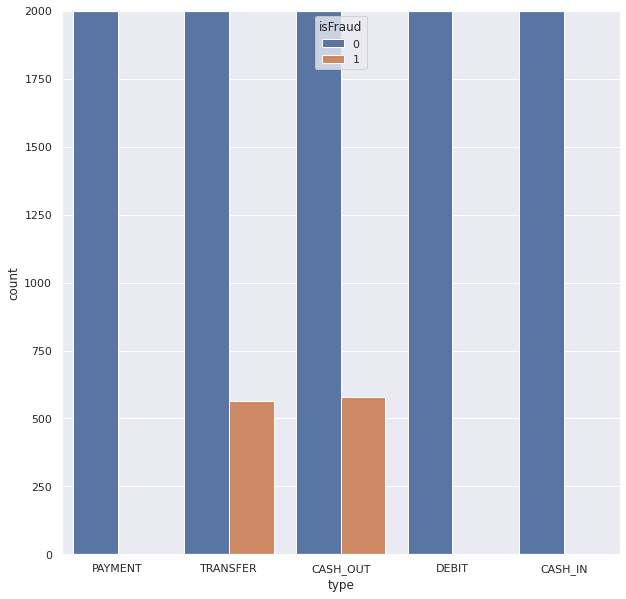

In [ ]:
ymin,ymax=plt.ylim()
scale_factor=2000
plt. ylim(ymin * scale_factor, ymax * scale_factor)
sns.countplot(df.type, hue=df['isFraud'])  
plt.show()  

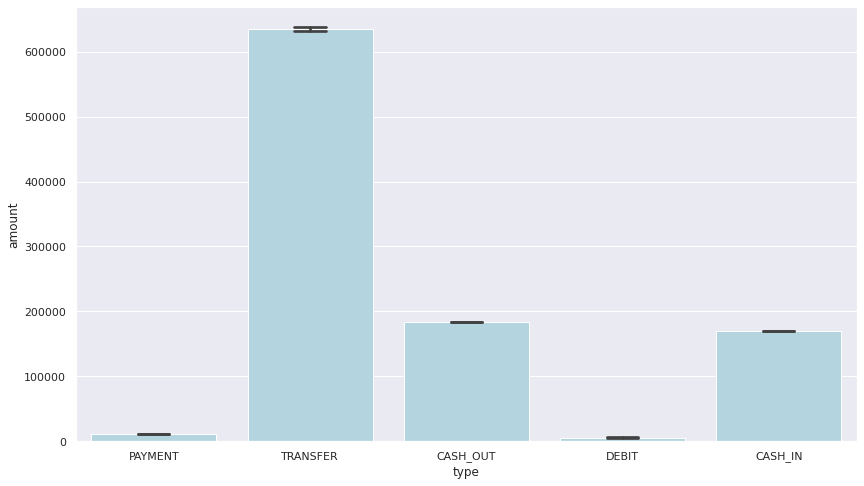

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x="type", y="amount", data=df, estimator=np.mean, ci=85, capsize=.2, color='lightblue')

In [7]:
class_0 = df.loc[df['isFraud'] == 0]["step"]
class_1 = df.loc[df['isFraud'] == 1]["step"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title=' Time Density Plot', xaxis=dict(title='Time [s]'),yaxis=dict(title='Density'))
iplot(fig, filename='dist_only')

NameError: name 'ff' is not defined

In [6]:
df_copy=df.loc[(df.type=='TRANSFER') | (df.type=='CASH_OUT')]
df_copy=df_copy.assign(errorbalanceDest=df_copy['oldbalanceDest']+df_copy['amount']-df_copy['newbalanceDest'])
df_copy

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,errorbalanceDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,2.136300e+04
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,1.827035e+05
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,2.377353e+05
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...,...
1048553,95,CASH_OUT,103391.93,C2021893664,107623.00,4231.07,C178178755,5752648.68,5856040.61,0,-9.313226e-10
1048558,95,CASH_OUT,26535.41,C1213094114,104187.00,77651.59,C216374600,205460.26,231995.66,0,1.000000e-02
1048565,95,TRANSFER,132387.24,C1654402840,15956.51,0.00,C1878219072,631284.08,763671.32,0,0.000000e+00
1048567,95,CASH_OUT,279674.05,C990252469,18002.85,0.00,C574439165,1847488.28,2127162.32,0,1.000000e-02


In [ ]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
Y = X['isFraud']
del X['isFraud']
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int)


In [ ]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.5, marker = '.', \
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



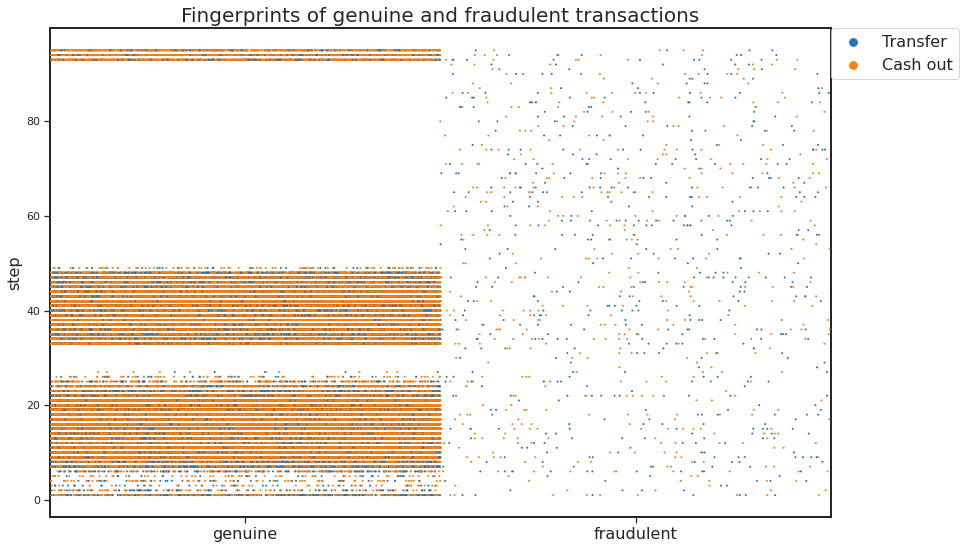

In [ ]:
ax = plotStrip(Y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('step', size = 16)
ax.set_title('Fingerprints of genuine and fraudulent transactions', size = 20);

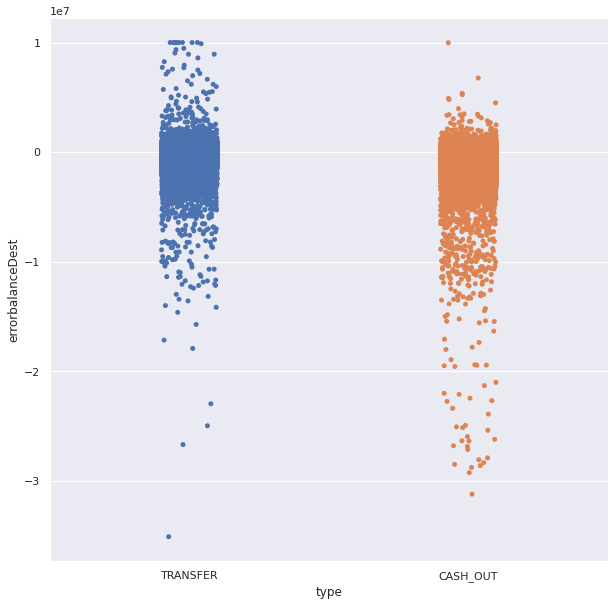

In [ ]:
sns.stripplot(x="type", y="errorbalanceDest", data=df_copy)

In [33]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [7]:
df_copy=df.copy()

In [9]:
print(df_copy)

         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  
0             160296.36  M1979787155            0.00            0.00        0  
1              19384.72  M2044282225           

In [10]:
df_copy=pd.concat([df_copy,pd.get_dummies(df_copy['type'], prefix='type_')],axis=1)
df_copy.drop(['type'],axis=1,inplace = True)

In [11]:
print(df_copy)

         step     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1    9839.64  C1231006815      170136.00       160296.36   
1           1    1864.28  C1666544295       21249.00        19384.72   
2           1     181.00  C1305486145         181.00            0.00   
3           1     181.00   C840083671         181.00            0.00   
4           1   11668.14  C2048537720       41554.00        29885.86   
...       ...        ...          ...            ...             ...   
1048570    95  132557.35  C1179511630      479803.00       347245.65   
1048571    95    9917.36  C1956161225       90545.00        80627.64   
1048572    95   14140.05  C2037964975       20545.00         6404.95   
1048573    95   10020.05  C1633237354       90605.00        80584.95   
1048574    95   11450.03  C1264356443       80584.95        69134.92   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  type__CASH_IN  \
0        M1979787155            0.00            0.00   

In [12]:
import imblearn

In [30]:
X=df_copy.copy().drop(['isFraud','nameDest','nameOrig'],axis=1)
y=df_copy['isFraud']
y.shape

(1048575,)

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X, y)
  
print('After OverSampling, the shape of train_X: {}'.format(X.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y == 0)))

After OverSampling, the shape of train_X: (2094866, 11)
After OverSampling, the shape of train_y: (2094866,) 

After OverSampling, counts of label '1': 1047433
After OverSampling, counts of label '0': 1047433


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_train.shape

(838860,)

In [35]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
  
predictions = lr.predict(X_test)

print(classification_report(y_test, predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.52      0.34      0.41       224

    accuracy                           1.00    209715
   macro avg       0.76      0.67      0.71    209715
weighted avg       1.00      1.00      1.00    209715

0.9989652623798966
